In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'afm' from 'matplotlib' (C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py)

In [7]:
# import os
# os.path.abspath('Gradient descent.ipynb')

In [8]:
gamma = lambda x: np.sqrt(np.pi * 2**2/num_particle) /(5*(np.log(x**2 + 1) + 1))

def gamma1(new_vec, gradient, num_particle, parameter):
    beta = 0.3
    g = parameter*2 
    vec_grad = gradient.reshape(2*num_particle)
    while potential(new_vec - g*gradient, num_particle) > potential(new_vec, num_particle) - g*np.dot(vec_grad, vec_grad)/2:
        g = g*beta
    return g

def potential(vec, num_particle):
    u=0
    for i in range(num_particle):
        for j in range (num_particle):
            if i < j:
                u += 1/np.dot(vec[i] - vec[j], (vec[i]-vec[j]))**(7/2)
    return np.trace(np.dot(vec, vec.T)) + u

def grad( vec, num_particle):
    gr = np.zeros((num_particle,2))
    for i in range(num_particle):
        for j in range(num_particle):
            if i!=j:
                gr[i] += - 7*(vec[i]-vec[j]) / np.dot(vec[i]-vec[j], (vec[i]-vec[j]).T)**(9/2)
        gr[i] = gr[i] + 2*vec[i]
    return gr

def evolution(n):
    
    eps = 1e-6
    
    for i in range(n):
        
        U = np.zeros(10)
        V = np.zeros((10, i+1, 2))
        
        for j in range(10):
            
            diff = 1
            it = 0
            k = 0.1
            
            new_vec = (np.random.rand(2*(i+1))*4 - 2.).reshape(i+1,2)
            while diff > eps:
                start_vec = np.copy(new_vec)
                gradient = grad(start_vec, (i+1))
                if it < i+1:
                    new_vec -= gamma(it) * grad(start_vec, (i+1))
                else:
                    k = gamma1(new_vec, gradient, (i+1), k)
                    new_vec -= k * grad(start_vec, (i+1))
                diff = np.sqrt(np.trace(np.dot((new_vec - start_vec), (new_vec - start_vec).T)))
                it += 1
            V[j, :, :] = new_vec
            U[j] = potential(new_vec, i+1)/(i+1)
#             print(U)
#             print(V)
        
        particles = V[np.argmin(U), :, :]
        
        str_pot = r'$U_{part} = $' + f"{U[np.argmin(U)]:.6f}"
        str_part = r'$N_{part} = $' + str(i+1)
        
        fig, ax = plt.subplots(figsize=(8,8))
        ax.scatter(x = new_vec[:,0], y = new_vec[:,1], color='red', s=50, alpha=1)
        ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
        ax.text(2.5, 4.5, str_pot, size=13)
        ax.text(2.5, 5.2, str_part, size=13)
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        
#         ax.spines['right'].set_color('none')
#         ax.spines['top'].set_color('none')

#         ax.xaxis.set_ticks_position('bottom')
#         ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

#         ax.yaxis.set_ticks_position('left')
#         ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
        
        plt.savefig('picture_'+str(i+1)+'.jpg')

In [ ]:
%%time

num_particle = 43
new_vec = (np.random.rand(2*num_particle)*4 - 2.).reshape(num_particle,2)
eps = 1e-7
diff = 1
it = 0
k = 0.1


while diff > eps:
    start_vec = np.copy(new_vec)
    gradient = grad(start_vec, num_particle)
    if it < num_particle:
        new_vec -= gamma(it) * grad(start_vec, num_particle)
    else:
        k = gamma1(new_vec, gradient, num_particle, k)
        new_vec -= k * grad(start_vec, num_particle)
    diff = np.sqrt(np.trace(np.dot((new_vec - start_vec), (new_vec - start_vec).T)))
    it += 1
print(it)

str_pot = r'$U_{part} = $' + f"{potential(new_vec, num_particle)/num_particle:.5f}"
str_part = r'$N_{part} = $' + str(num_particle)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x = new_vec[:,0], y = new_vec[:,1], color='red', s=50, alpha=1)
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax.text(2.5, 4.5, str_pot, size=13)
ax.text(2.5, 5.2, str_part, size=13)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# ax.xaxis.set_ticks_position('bottom')
# ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

# ax.yaxis.set_ticks_position('left')
# ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
print('Potential is {}'.format(potential(new_vec, num_particle)))

plt.savefig('picture_'+str(num_particle)+'.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Wall time: 8h 15min 33s


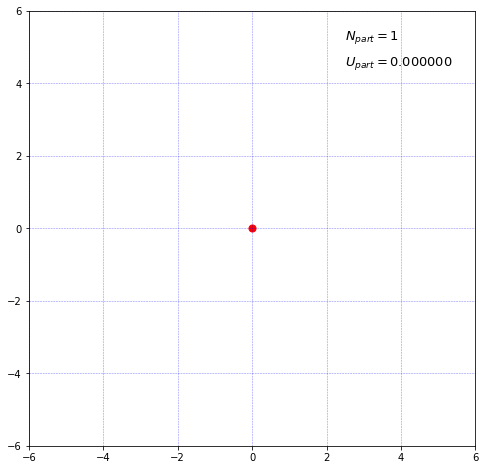

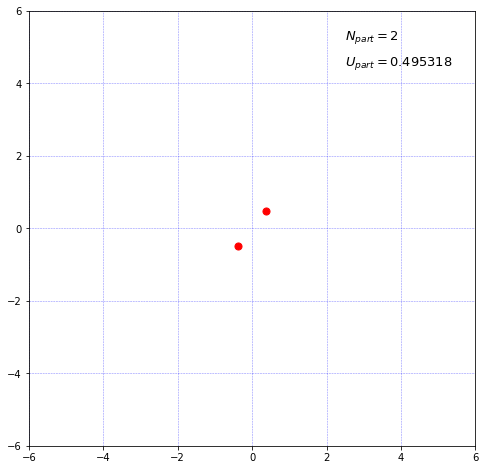

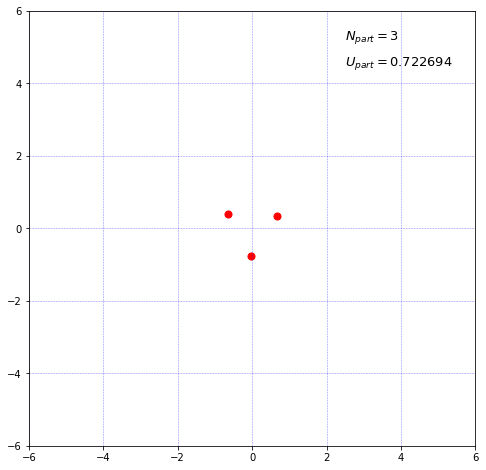

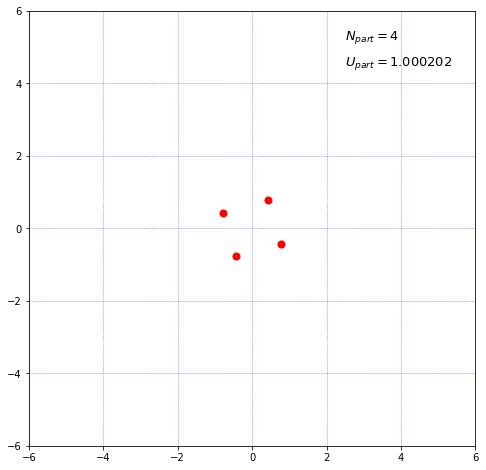

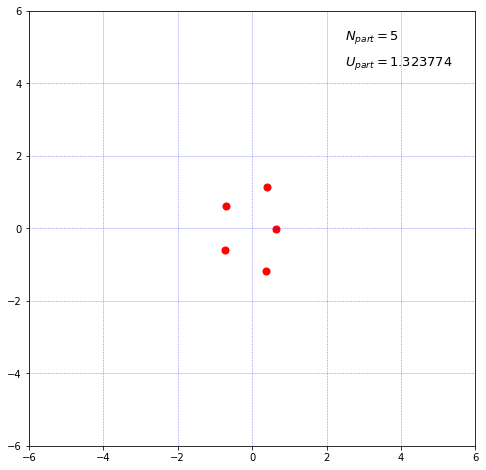

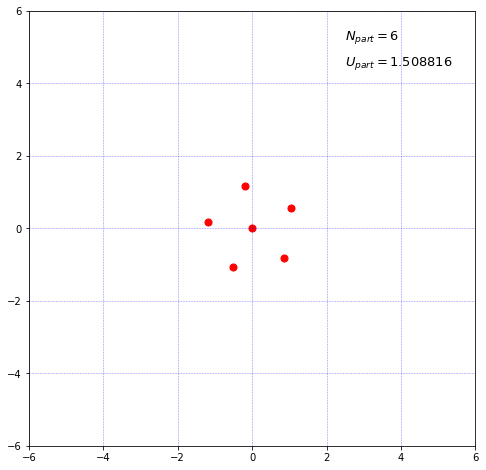

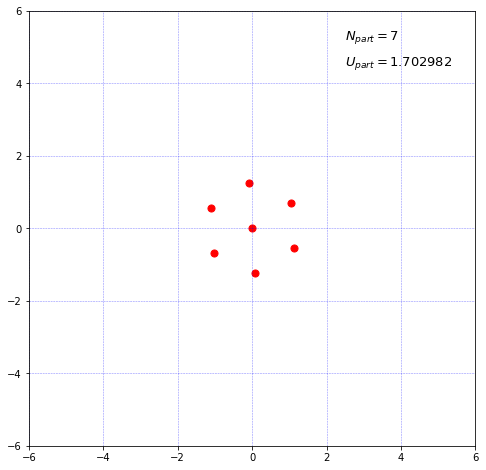

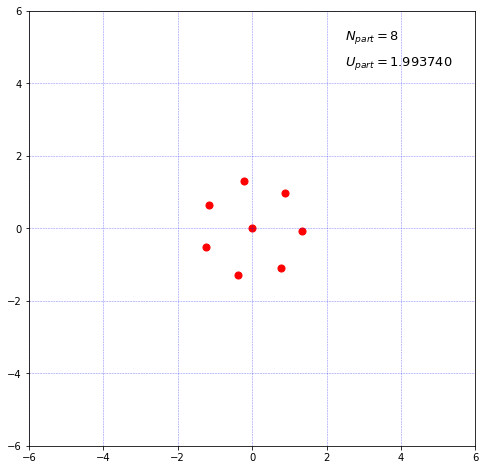

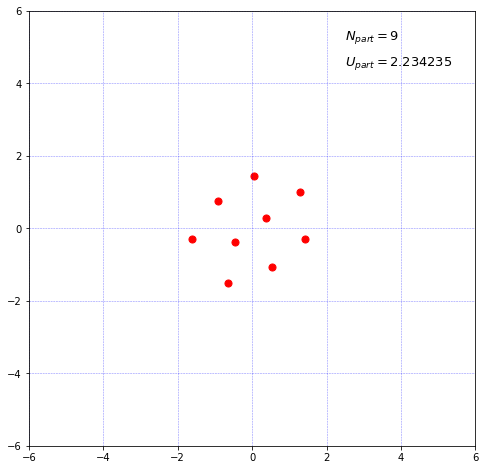

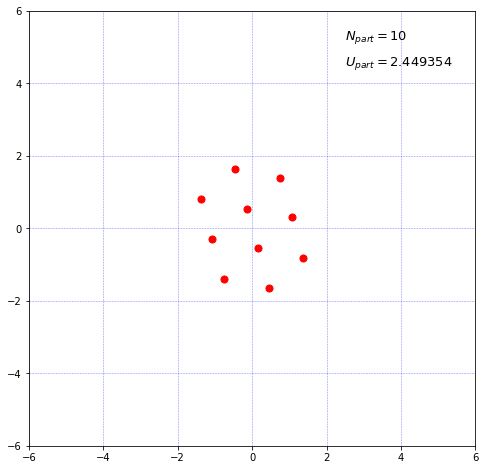

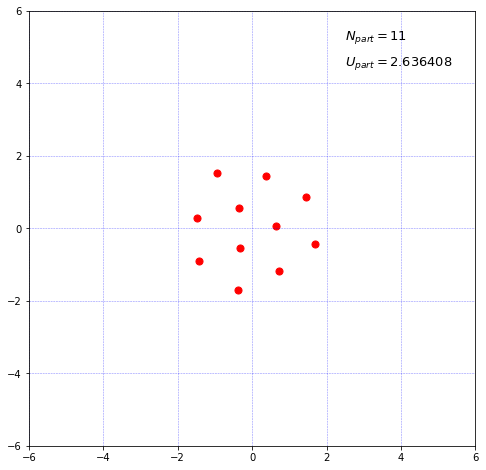

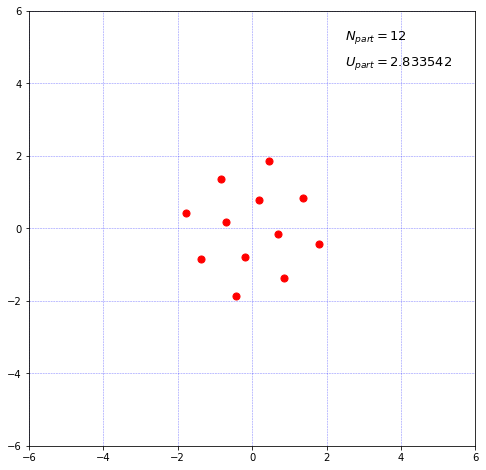

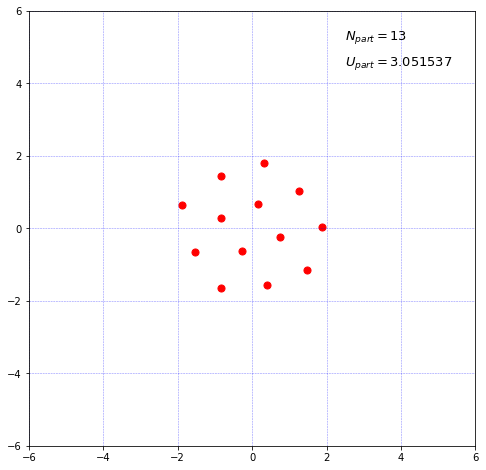

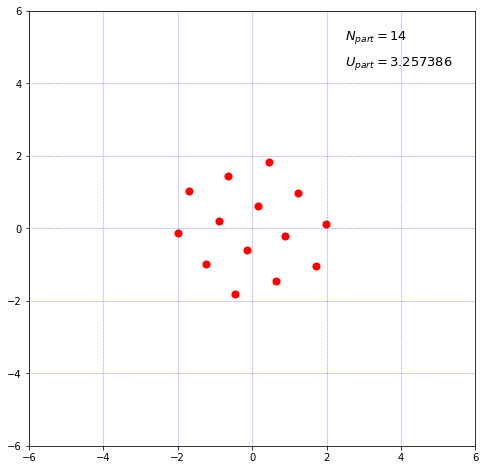

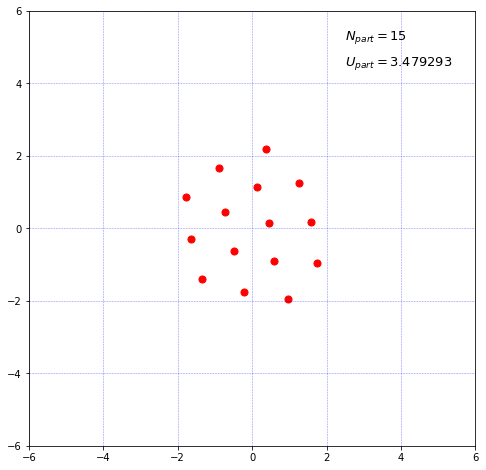

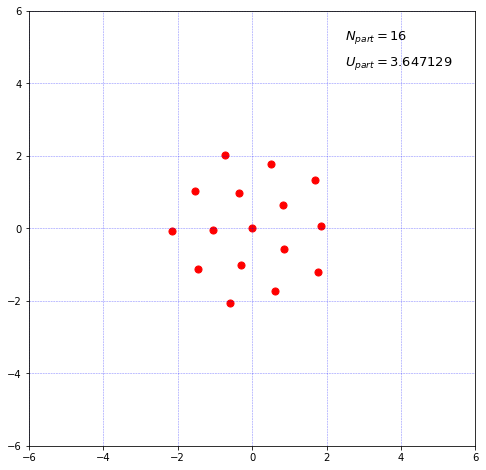

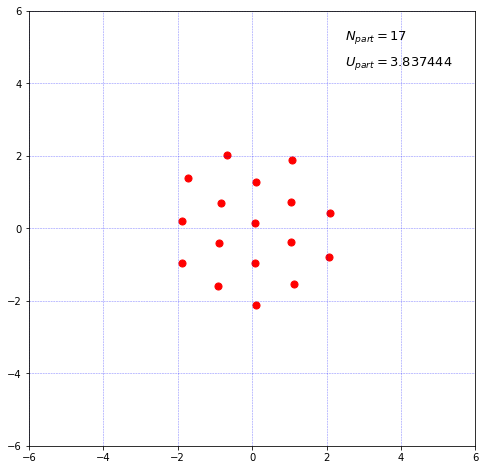

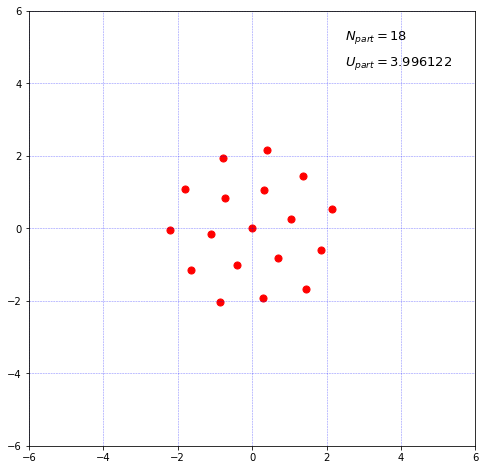

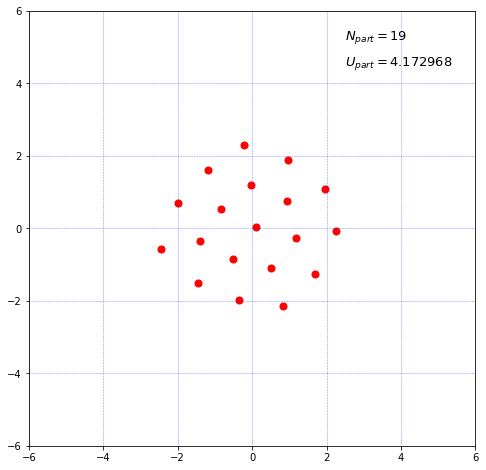

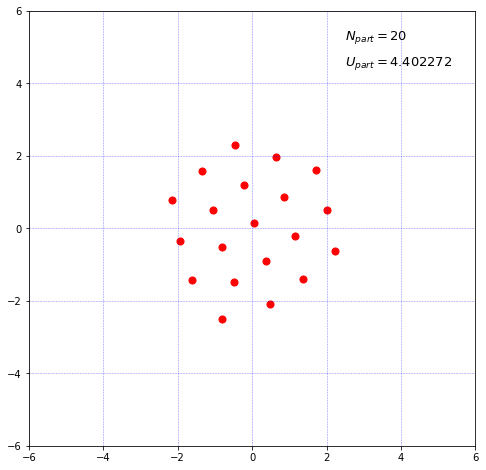

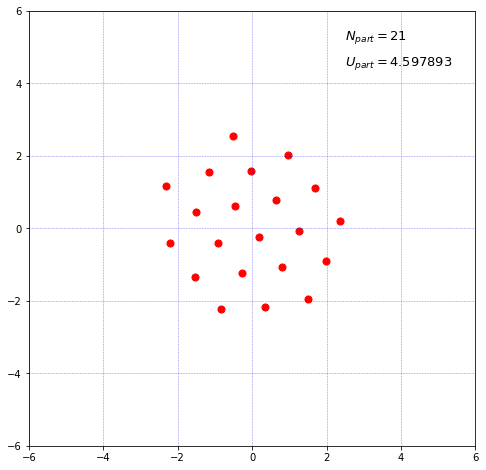

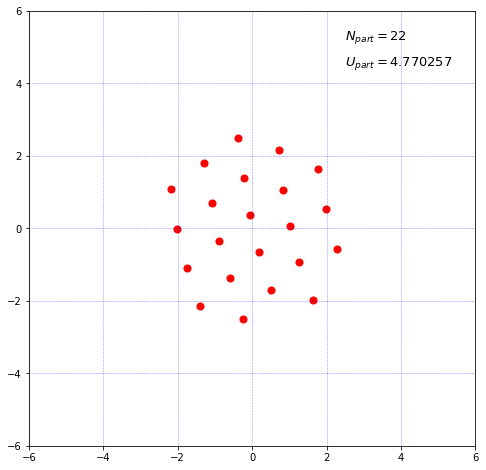

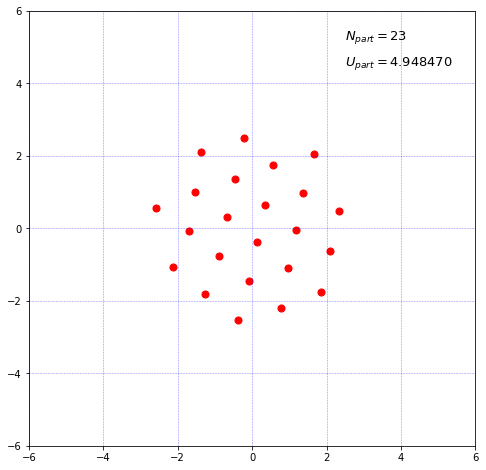

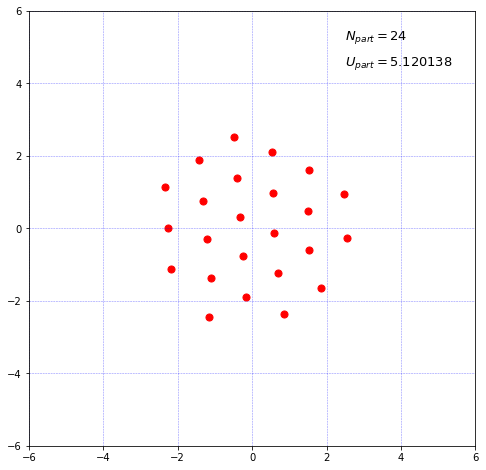

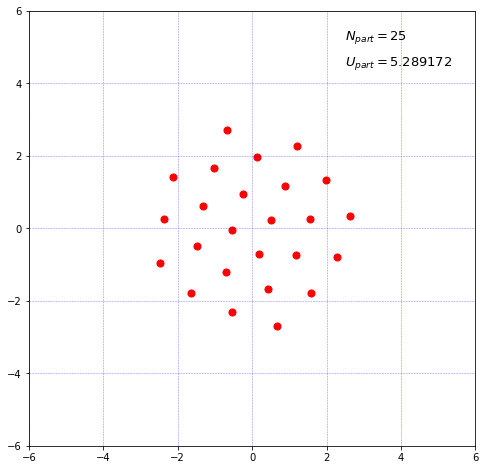

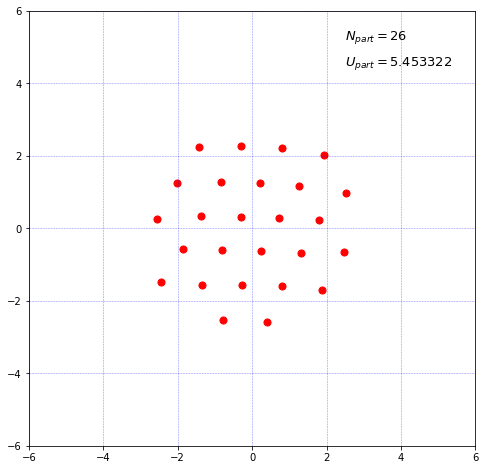

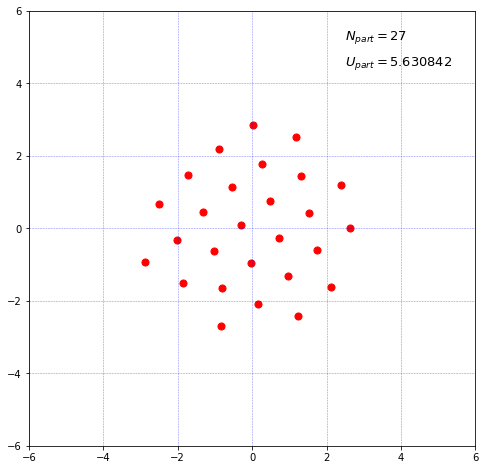

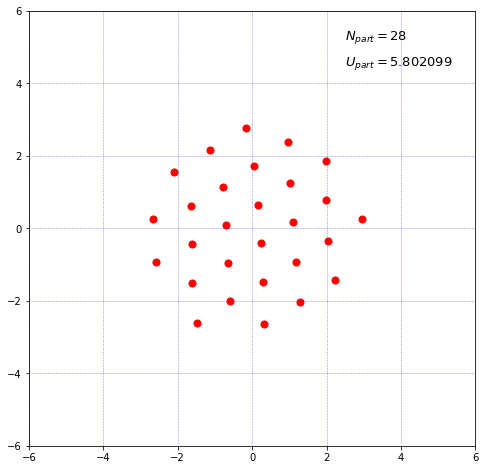

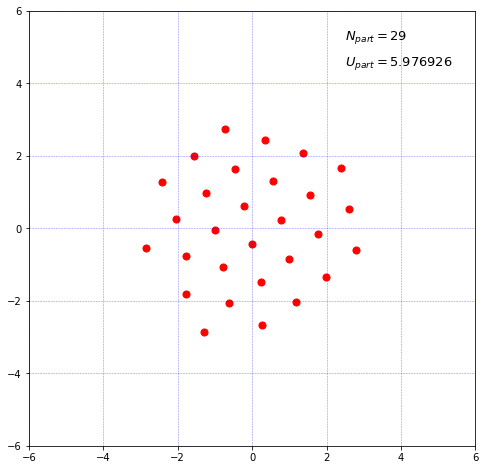

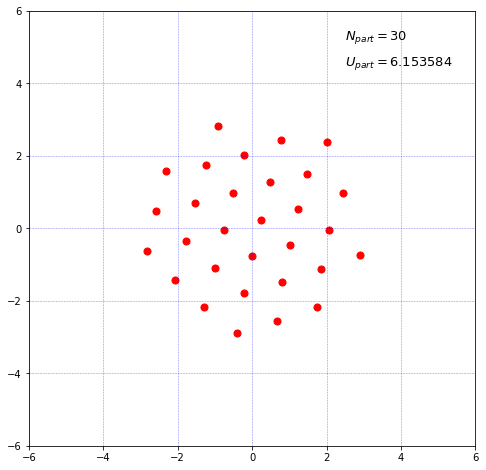

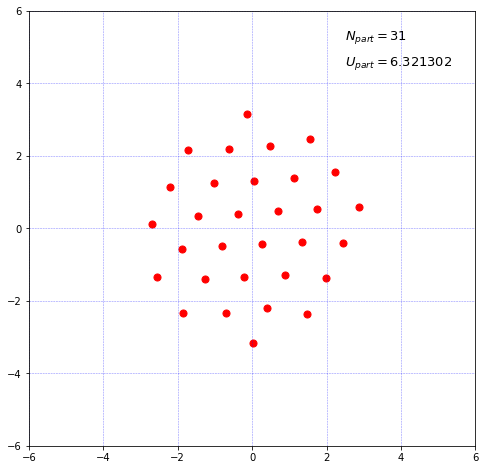

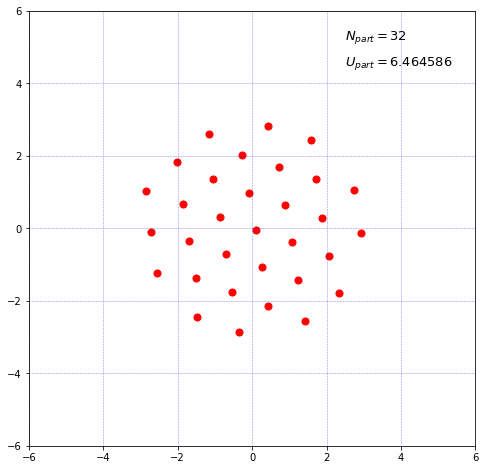

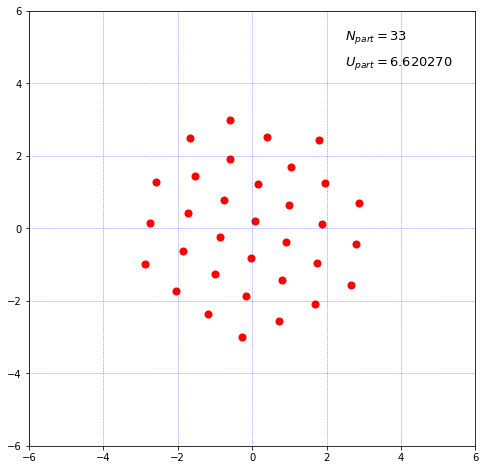

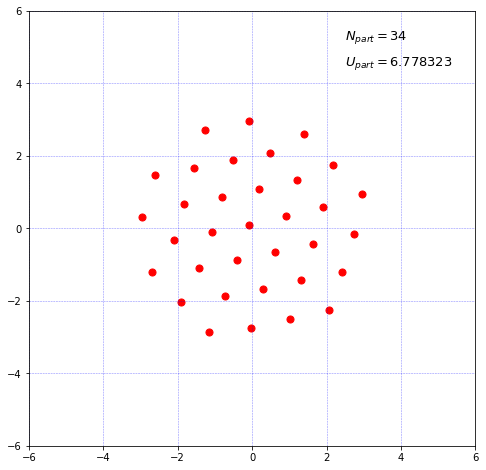

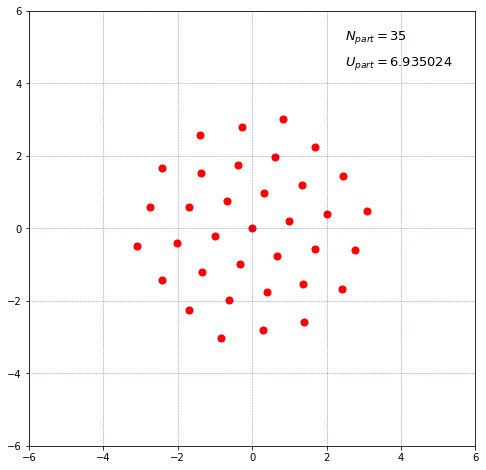

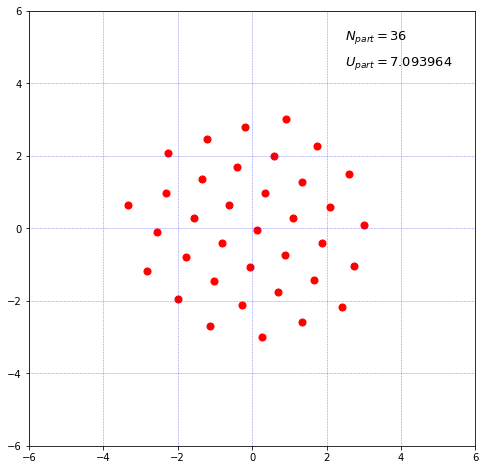

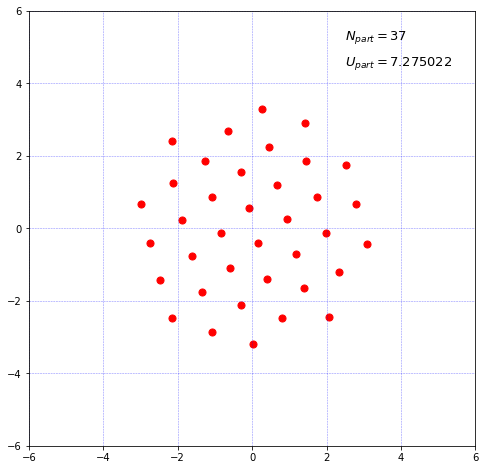

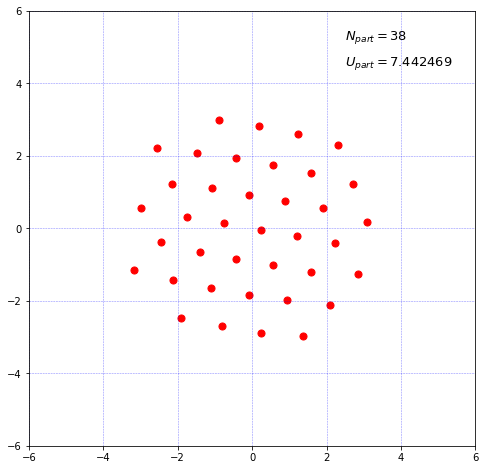

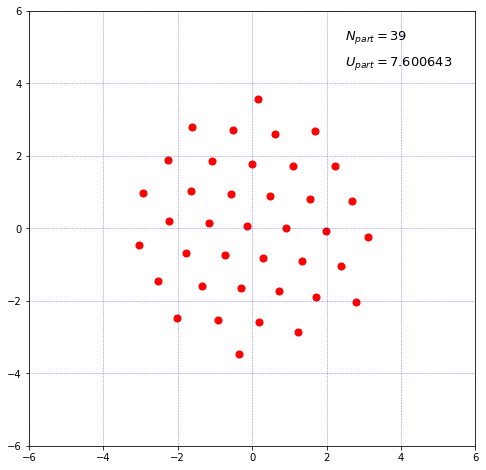

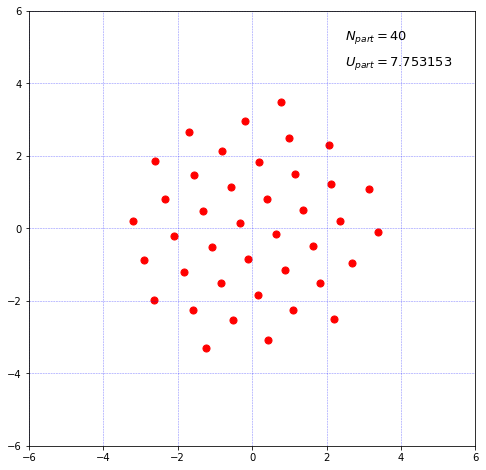

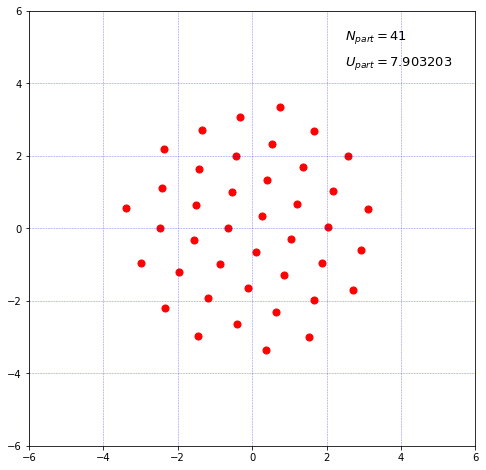

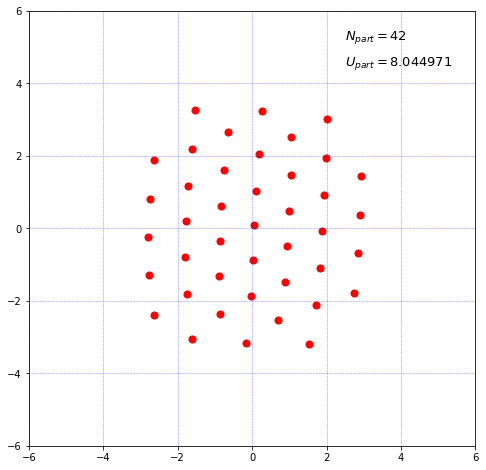

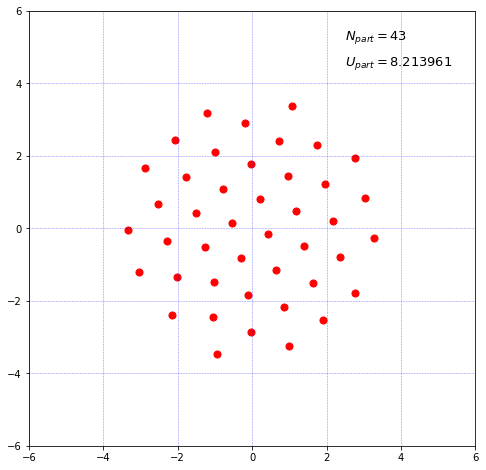

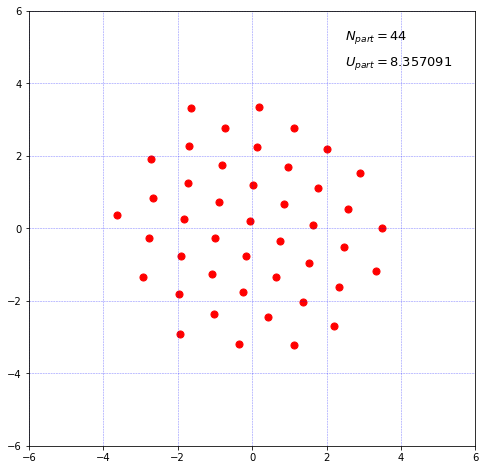

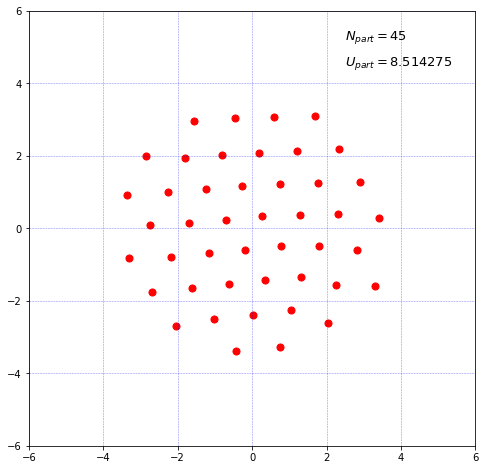

In [4]:
%%time
num_particle = 45
evolution(num_particle)

In [ ]:
!conda uninstall matplotlib